In [51]:
import sklearn.datasets
import numpy as np

# Loading dataset

In [52]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [53]:
X = breast_cancer.data
Y = breast_cancer.target

In [54]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [55]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [56]:
import pandas as pd

In [57]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [58]:
data['class'] = breast_cancer.target

In [59]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [60]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [61]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [62]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [63]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Train test split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = data.drop('class', axis=1)
Y = data['class']

In [66]:
type(X)

pandas.core.frame.DataFrame

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [68]:
print(Y.shape, Y_train.shape, Y_test.shape)

(569,) (426,) (143,)


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [70]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y)

In [72]:
print(X_train.mean(), X_test.mean(), X.mean())

mean radius                 14.135211
mean texture                19.312109
mean perimeter              91.996055
mean area                  655.478516
mean smoothness              0.096366
mean compactness             0.103596
mean concavity               0.088554
mean concave points          0.049030
mean symmetry                0.181511
mean fractal dimension       0.062659
radius error                 0.406322
texture error                1.216111
perimeter error              2.861501
area error                  40.563680
smoothness error             0.006981
compactness error            0.025217
concavity error              0.031646
concave points error         0.011803
symmetry error               0.020494
fractal dimension error      0.003770
worst radius                16.277139
worst texture               25.672812
worst perimeter            107.260625
worst area                 881.941602
worst smoothness             0.132227
worst compactness            0.252250
worst concav

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

In [74]:
print(X_train.mean(), X_test.mean(), X.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

# Binarisation of input

In [75]:
import matplotlib.pyplot as plt

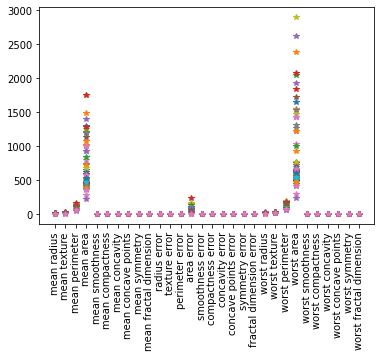

In [76]:
plt.plot(X_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [77]:
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)

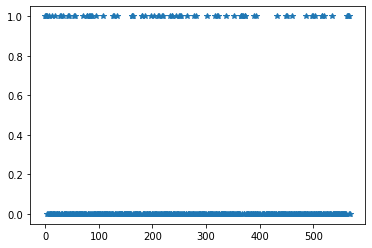

In [78]:
plt.plot(X_binarised_3_train, '*')

In [79]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

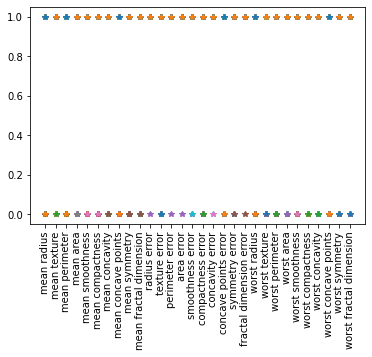

In [80]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [81]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [82]:
type(X_binarised_test)

pandas.core.frame.DataFrame

In [83]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [84]:
type(X_binarised_test)

numpy.ndarray

# MP neuron model

In [85]:
from random import randint

In [86]:
b = 3

i = randint(0, X_binarised_train.shape[0])

print('For row', i)

if (np.sum(X_binarised_train[100, :]) >= b):
  print('MP Neuron inference is malignant')
else:
  print('MP Neuron inference is benign')
  
if (Y_train[i] == 1):
  print('Ground truth is malignant')
else:
  print('Ground truth is benign')

For row 87
MP Neuron inference is malignant
Ground truth is benign


In [87]:
b = 3

Y_pred_train = []
accurate_rows = 0

for x, y in zip(X_binarised_train, Y_train):
  y_pred = (np.sum(x) >= b)
  Y_pred_train.append(y_pred)
  accurate_rows += (y == y_pred)
  
print(accurate_rows, accurate_rows/X_binarised_train.shape[0])
  

321 0.626953125


In [88]:
for b in range(X_binarised_train.shape[1] + 1):
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train, Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

  print(b, accurate_rows/X_binarised_train.shape[0])  

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [89]:
from sklearn.metrics import accuracy_score

In [90]:
b = 28

Y_pred_test = []

for x in X_binarised_test:
  y_pred = (np.sum(x) >= b)
  Y_pred_test.append(y_pred)

accuracy = accuracy_score(Y_pred_test, Y_test)

print(b, accuracy)  

28 0.7894736842105263


# MP Neuron Class

In [91]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [92]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 28
Highest accuracy is 0.849609375


In [93]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [94]:
print(accuracy_test)

0.7894736842105263


# Perceptron Class

In [95]:
X_train = X_train.values
X_test = X_test.values

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$

In [96]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    plt.plot(list(accuracy.values()))
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(wt_matrix)

In [97]:
perceptron = Perceptron()

0.94921875


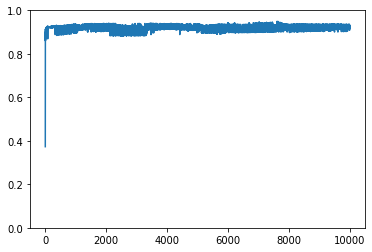

In [98]:
wt_matrix = perceptron.fit(X_train, Y_train, 10000, 0.5)

In [99]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9473684210526315


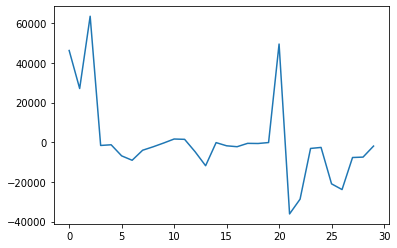

In [100]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [101]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

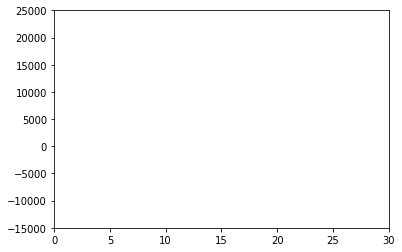

In [102]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [103]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [104]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [105]:
HTML(anim.to_html5_video())